### 00. data load

In [85]:
"""A library to load the MNIST image data.  For details of the data
structures that are returned, see the doc strings for ``load_data``
and ``load_data_wrapper``.  In practice, ``load_data_wrapper`` is the
function usually called by our neural network code.

"""

import cPickle
import gzip
import numpy as np


def load_data():
    """Return the MNIST data as a tuple containing the training data,
    the validation data, and the test data.

    The ``training_data`` is returned as a tuple with two entries.
    The first entry contains the actual training images.  This is a
    numpy ndarray with 50,000 entries.  Each entry is, in turn, a
    numpy ndarray with 784 values, representing the 28 * 28 = 784
    pixels in a single MNIST image.

    The second entry in the ``training_data`` tuple is a numpy ndarray
    containing 50,000 entries.  Those entries are just the digit
    values (0...9) for the corresponding images contained in the first
    entry of the tuple.

    The ``validation_data`` and ``test_data`` are similar, except
    each contains only 10,000 images.

    This is a nice data format, but for use in neural networks it's
    helpful to modify the format of the ``training_data`` a little.
    That's done in the wrapper function ``load_data_wrapper()``, see
    below.

    """

    f = gzip.open('./data/mnist.pkl.gz', 'rb')
    training_data, validation_data, test_data = cPickle.load(f)
    f.close()
    return (training_data, validation_data, test_data)


def load_data_wrapper():
    """Return a tuple containing ``(training_data, validation_data,
    test_data)``. Based on ``load_data``, but the format is more
    convenient for use in our implementation of neural networks.

    In particular, ``training_data`` is a list containing 50,000
    2-tuples ``(x, y)``.  ``x`` is a 784-dimensional numpy.ndarray
    containing the input image.  ``y`` is a 10-dimensional
    numpy.ndarray representing the unit vector corresponding to the
    correct digit for ``x``.

    ``validation_data`` and ``test_data`` are lists containing 10,000
    2-tuples ``(x, y)``.  In each case, ``x`` is a 784-dimensional
    numpy.ndarry containing the input image, and ``y`` is the
    corresponding classification, i.e., the digit values (integers)
    corresponding to ``x``.

    Obviously, this means we're using slightly different formats for
    the training data and the validation / test data.  These formats
    turn out to be the most convenient for use in our neural network
    code.

    """

    tr_d, va_d, te_d = load_data()
    training_inputs = [np.reshape(x, (784, 1)) for x in tr_d[0]]
    training_results = [vectorized_result(y) for y in tr_d[1]]
    training_data = zip(training_inputs, training_results)
    validation_inputs = [np.reshape(x, (784, 1)) for x in va_d[0]]
    validation_data = zip(validation_inputs, va_d[1])
    test_inputs = [np.reshape(x, (784, 1)) for x in te_d[0]]
    test_data = zip(test_inputs, te_d[1])
    return (training_data, validation_data, test_data)


def vectorized_result(j):
    """Return a 10-dimensional unit vector with a 1.0 in the jth
    position and zeroes elsewhere.  This is used to convert a digit
    (0...9) into a corresponding desired output from the neural
    network.

    """

    e = np.zeros((10, 1))
    e[j] = 1.0
    return e

### 01. computation graph

In [86]:
from __future__ import division, print_function, absolute_import

class Graph(object):
    """The graph or network structure of a neural network.

    Arguments:
        config(list): a list of tuples with each tuple contains the name and
            parameters of a layer.

    Attributes:
        config(list): a list of tuples with each tuple contains the name and
            parameters of a layer.
        layers(list): a list of layers. Each layer is a layer object
            instantiated using a class from the "layer" module.

    """

    def __init__(self, config):
        self.config = config
        self.layers = []

        for layer_name, layer_params in config:
            self.__check_layer(layer_name)

            layer = self.__create_layer(layer_name, layer_params)
            self.layers.append(layer)

    def __getitem__(self, key):
        return self.layers[key]

    def __str__(self):
        graph_str = ""
        for layer_name, layer_params in self.config:
            graph_str += "{} {}\n".format(layer_name, layer_params)
        return graph_str

    def __check_layer(self, layer_name):
        if layer_name not in globals():
            raise NameError(
                "{} is not an valid layer name!".format(layer_name)
            )

    def __create_layer(self, layer_name, layer_params):
        if layer_params:
            return globals()[layer_name](**layer_params)
        else:
            return globals()[layer_name]()

### 02. loss

In [87]:
"""All the loss functions go here.

"""

from __future__ import division, print_function, absolute_import

import numpy as np


class Euclidean(object):
    """The Euclidean loss 'L = 1 / 2 || y_pred - y ||^2'.

    """

    def forward(self, y_pred, y):
        """Compute the Euclidean loss.

        Args:
            y_pred(np.array): the prediction.
            y(np.array): the ground truth.

        Return:
            The Euclidean loss.

        """

        # TODO: Forward code
        loss = 0.5*np.sum(np.square((y_pred - y)))/y.shape[0]
        return(loss)

    def backward(self, y_pred, y):
        """Compute the derivative of the Euclidean loss.

        Args:
            y_pred(np.array): the prediction.
            y(np.array): the ground truth.

        Returns:
            The derivative of the loss with respect to the y_pred.

        """

        # TODO: Backward code
        diff = y_pred - y
        return(diff)

### 03.layer

In [88]:
"""All the layer functions go here.
"""

from __future__ import division, print_function, absolute_import
import numpy as np


class FullyConnected(object):
    """Fully connected layer 'y = Wx + b'.

    Arguments:
        shape(tuple): the shape of the fully connected layer. shape[0] is the
            output size and shape[1] is the input size.

    Attributes:
        W(np.array): the weights of the fully connected layer. An n-by-m matrix
            where m is the input size and n is the output size.
        b(np.array): the biases of the fully connected layer. A n-by-1 vector
            where n is the output size.

    """

    def __init__(self, shape):
        
        self.W = np.random.randn(shape[0],shape[1])
        self.b = np.random.randn(shape[0], 1)

    def forward(self, x):
        """Compute the layer output.

        Args:
            x(np.array): the input of the layer.

        Returns:
            The output of the layer.

        """

        # TODO: Forward code
        linear_combination = np.dot(self.W,x)+self.b
        return(linear_combination)

    def backward(self, x, dv_y):
        """Compute the gradients of weights and biases and the gradient with
        respect to the input.

        Args:
            x(np.array): the input of the layer.
            dv_y(np.array): The derivative of the loss with respect to the
                output.

        Returns:
            dv_x(np.array): The derivative of the loss with respect to the
                input.
            dv_W(np.array): The derivative of the loss with respect to the
                weights.
            dv_b(np.array): The derivative of the loss with respect to the
                biases.

        """

        # TODO: Backward code
        dv_b = dv_y
        dv_W = np.dot(x,dv_y.T).T
        dv_x = np.dot(self.W.T,dv_y)
        out = [dv_x,dv_W,dv_b]
        return(out)
    
    def update(self,W_new,b_new):
        self.W = W_new
        self.b = b_new


class Sigmoid(object):
    """Sigmoid function 'y = 1 / (1 + exp(-x))'

    """
    def __init__(self):    
        self.W=None
        self.b=None
    
    def forward(self, x):
        """Compute the layer output.

        Args:
            x(np.array): the input of the layer.

        Returns:
            The output of the layer.

        """

        # TODO: Forward code
        z = 1.0/(1.0+np.exp(-x))
        return(z)

    def backward(self, x, dv_y):
        """Compute the gradient with respect to the input.

        Args:
            x(np.array): the input of the layer.
            dv_y(np.array): The derivative of the loss with respect to the
                output.

        Returns:
            The derivative of the loss with respect to the input.

        """
        
        y = self.forward(x)
        dv_x = y*(1-y)*dv_y
        dv_w = False
        dv_b = False
        out = [dv_x,dv_w,dv_b]
        return(out)
    
    
class tanh(object):
    """Rectilinear unit : 
       
       f(x) = {(1-e^(−2x))}/{1+e^(−2x)}

    """
    def __init__(self):    
        self.W=None
        self.b=None

    def forward(self, x):
        """Compute the layer output.

        Args:
            x(np.array): the input of the layer.

        Returns:
            The output of the layer.

        """
        z = (1-np.exp(-2*x))/(1+np.exp(-2*x))
        return(z)

    def backward(self, x, dv_y):
        """Compute the gradient with respect to the input.

        Args:
            x(np.array): the input of the layer.
            dv_y(np.array): The derivative of the loss with respect to the
                output.

        Returns:
            The derivative of the loss with respect to the input.

        """
        
        z = self.forward(x)
        dv_x = (1-np.square(z))*dv_y
        dv_w = False
        dv_b = False
        out = [dv_x,dv_w,dv_b]
        return(out)

### 04. network

In [89]:
from __future__ import division, print_function, absolute_import
import numpy as np


class Network(object):
    """Neural Network.

    Attributes:
        graph(obj): A "Graph" object that describes the layers of the network.

    """

    def __init__(self, graph):
        self.graph = graph
        self.test_error = {}
        self.validation_error = 0

    def inference(self, a):
        """Feedforward an input to the network.

        Args:
            a(np.array): the input data.

        Returns:
            The output of the network.
        """

        for layer in self.graph:
            a = layer.forward(a)
        return(a)

    def train(self, training_data, epochs, loss, optimizer, test_data=None):
        """Train the neural network.

        Args:
            training_data(list): a list of tuples ``(x, y)`` representing the
                training inputs and the desired outputs.
            epochs(int): number of epochs to train.
            loss(obj): a loss object instantiated using a class from the
                ``loss`` module. The loss function that will be used for the
                training.
            optimizer(obj): a optimizer object instantiated using a class from
                the ``optimization`` module. The optimization method that will
                be used for the training.
            test_data(list, optional): a list of tuples ``(x, y)`` representing
                the inputs and the desired outputs. If provided, then the
                network will be evaluated against the test data after each
                epoch, and partial progress printed out.  This is useful for
                tracking progress, but slows things down substantially.

        """
        print(
            "Training the network for {} epoch(s). "
            "This may take a while.".format(epochs)
        )

        for j in xrange(epochs):
            optimizer.optimize(self.graph, loss, training_data)

            if test_data:
                test_accuracy = self.test(test_data)
                print(
                    "Epoch {0}: {1} / {2}".format(
                        j, test_accuracy, len(test_data)
                    )
                )
                self.test_error[j] = 1.0-test_accuracy/len(test_data)
            else:
                print("Epoch {0} complete".format(j))
    
    def test(self, test_data):
        """Test the network

        Args:
            test_data(list): a list of tuples ``(x, y)`` representing the
            inputs and the desired outputs. If provided, then the network will
            be evaluated against the test data after each epoch, and partial
            progress printed out.  This is useful for tracking progress, but
            slows things down substantially.

        Returns:
            The number of test inputs for which the neural network outputs the
            correct result. Note that the neural network's output is assumed to
            be the index of whichever neuron in the final layer has the highest
            activation.

        """
        test_results = [(np.argmax(self.inference(x)), y)
                        for (x, y) in test_data]
        return sum(int(x == y) for (x, y) in test_results)

### 05. optimization

In [90]:
"""All the optimization methods go here.

"""

from __future__ import division, print_function, absolute_import
import random
import numpy as np


class SGD(object):
    """Mini-batch stochastic gradient descent.

    Attributes:
        learning_rate(float): the learning rate to use.
        batch_size(int): the number of samples in a mini-batch.

    """

    def __init__(self, learning_rate, batch_size):
        self.learning_rate = float(learning_rate)
        self.batch_size = batch_size

    def __has_parameters(self, layer):
        return hasattr(layer, "W")

    def compute_gradient(self, x, y, graph, loss):
        """ Compute the gradients of network parameters (weights and biases)
        using backpropagation.

        Args:
            x(np.array): the input to the network.
            y(np.array): the ground truth of the input.
            graph(obj): the network structure.
            loss(obj): the loss function for the network.

        Returns:
            dv_Ws(list): a list of gradients of the weights.
            dv_bs(list): a list of gradients of the biases.

        """

        # TODO: Backpropagation code
        dv_Ws = []
        dv_bs = []
        
        x_l = [x.copy()]
        y_pred = Network(graph).inference(x)        
        error = loss.forward(y_pred,y)
        dv_o = loss.backward(y_pred,y)
        n_layer = len(graph.layers)
        stage = np.arange(n_layer)

        for layer_number in stage:
            layer = graph.layers[layer_number]
            x_l = x_l + [layer.forward(x_l[layer_number])]
            
        for layer_number in stage[::-1]:
            layer = graph.layers[layer_number]
            dv  = layer.backward(x=x_l[layer_number],dv_y=dv_o)
            dv_o = dv[0]
            dv_Ws = [dv[1]]+dv_Ws
            dv_bs = [dv[2]]+dv_bs
            
        out = [dv_Ws,dv_bs]
        return(out)

    def optimize(self, graph, loss, training_data):
        """ Perform SGD on the network defined by 'graph' using
        'training_data'.

        Args:
            graph(obj): a 'Graph' object that defines the structure of a
                neural network.
            loss(obj): the loss function for the network.
            training_data(list): a list of tuples ``(x, y)`` representing the
                training inputs and the desired outputs.

        """

        # Network parameters
        # Ws = [layer.W for layer in graph if self.__has_parameters(layer)]
        # bs = [layer.b for layer in graph if self.__has_parameters(layer)]

        # Shuffle the data to make sure samples in each batch are not
        # correlated
        random.shuffle(training_data)
        n = len(training_data)

        batches = [
            training_data[k:k + self.batch_size]
            for k in xrange(0, n, self.batch_size)
        ]

        # TODO: SGD code        
        for batch in batches:
            
            dv_Ws=[]
            dv_bs=[]
            
            for x,y in batch:
                dv_Wi,dv_bi = self.compute_gradient(x=x,y=y,graph=graph,loss=loss)
                dv_Ws += [dv_Wi]
                dv_bs += [dv_bi]
            
            dv_Wsum = np.sum(dv_Ws,axis=0)
            dv_bsum = np.sum(dv_bs,axis=0)
            n_layer = len(graph.layers)
            
            for layer_number in np.arange(n_layer):
                if graph.layers[layer_number].W is not None:
                    graph.layers[layer_number].W -= (self.learning_rate*dv_Wsum[layer_number])/batch_size
                    graph.layers[layer_number].b -= (self.learning_rate*dv_bsum[layer_number])/batch_size

### 06. Demo - Sigmoid

In [91]:
"""This is a simple example for training a neural network. This example
demonstrates some usage of the modules. You may use this code to test your
implementation.

"""

import numpy as np

# Load the MNIST dataset
training_data, validation_data, test_data = load_data_wrapper()

# The network definition of a neural network
graph_config = [
    ("FullyConnected", {"shape": (30, 784)}),
    ("Sigmoid", {}),
    ("FullyConnected", {"shape": (10, 30)}),
    ("Sigmoid", {})
]

learning_rate = 3.0
batch_size = 10
epoch = 25

graph = Graph(graph_config)
loss = Euclidean()
optimizer = SGD(learning_rate=learning_rate,
                batch_size=batch_size)  

network = Network(graph)
network.train(training_data = training_data,
              loss = loss,
              optimizer = optimizer,
              test_data = test_data,
              epochs = epoch)

# Test a handwritten digit image
x, y = test_data[0]
y_pred = np.argmax(network.inference(x))
print("The image is {}. Your prediction is {}.".format(y, y_pred))

Training the network for 25 epoch(s). This may take a while.
Epoch 0: 7381 / 10000
Epoch 1: 7524 / 10000
Epoch 2: 7604 / 10000
Epoch 3: 7622 / 10000
Epoch 4: 8508 / 10000
Epoch 5: 8510 / 10000
Epoch 6: 8580 / 10000
Epoch 7: 8535 / 10000
Epoch 8: 8576 / 10000
Epoch 9: 8576 / 10000
Epoch 10: 8566 / 10000
Epoch 11: 8579 / 10000
Epoch 12: 8587 / 10000
Epoch 13: 8577 / 10000
Epoch 14: 8592 / 10000
Epoch 15: 8601 / 10000
Epoch 16: 8596 / 10000
Epoch 17: 8617 / 10000
Epoch 18: 8598 / 10000
Epoch 19: 8596 / 10000
Epoch 20: 8597 / 10000
Epoch 21: 8614 / 10000
Epoch 22: 8617 / 10000
Epoch 23: 8624 / 10000
Epoch 24: 8619 / 10000
The image is 7. Your prediction is 7.


In [92]:
def varied_training(graph=graph,
                    training_data=training_data,
                    learning_rate=0.1,
                    batch_size=10,
                    test_data=test_data,
                    validation_data=validation_data,
                    epochs=10):
    
    loss = Euclidean()
    optimizer = SGD(learning_rate=learning_rate,
                    batch_size=batch_size)
    network = Network(graph)
    network.train(training_data = training_data,
                  loss = loss,
                  optimizer = optimizer,
                  test_data = test_data,
                  epochs = epoch)
    accuracy = network.test(validation_data)/len(validation_data)
    network.validation_error = 1-accuracy
    return(network)

In [93]:
default_config = [
    ("FullyConnected", {"shape": (30, 784)}),
    ("Sigmoid", {}),
    ("FullyConnected", {"shape": (10, 30)}),
    ("Sigmoid", {})
]

learning_rate = 3.0
batch_size = 10
epoch = 10

del network

# Testing variations

In [94]:
import time as time

### 01 : Layer variation

In [95]:
graph_config_layer_variation = [
    [
    ("FullyConnected", {"shape": (10, 784)}),
    ("Sigmoid", {})
],
    [
    ("FullyConnected", {"shape": (50, 784)}),
    ("Sigmoid", {}),
    ("FullyConnected", {"shape": (10, 50)}),
    ("Sigmoid", {})
],
    [
    ("FullyConnected", {"shape": (300, 784)}),
    ("Sigmoid", {}),
    ("FullyConnected", {"shape": (30, 300)}),
    ("Sigmoid", {}),
    ("FullyConnected", {"shape": (10, 30)}),
    ("Sigmoid", {})
],
    [
    ("FullyConnected", {"shape": (500, 784)}),
    ("Sigmoid", {}),
    ("FullyConnected", {"shape": (100,500)}),
    ("Sigmoid", {}),
    ("FullyConnected", {"shape": (30, 100)}),
    ("Sigmoid", {}),
    ("FullyConnected", {"shape": (10, 30)}),
    ("Sigmoid", {})
],
    [
    ("FullyConnected", {"shape": (500, 784)}),
    ("Sigmoid", {}),
    ("FullyConnected", {"shape": (300,500)}),
    ("Sigmoid", {}),
    ("FullyConnected", {"shape": (200,300)}),
    ("Sigmoid", {}),
    ("FullyConnected", {"shape": (30, 200)}),
    ("Sigmoid", {}),
    ("FullyConnected", {"shape": (10, 30)}),
    ("Sigmoid", {})
]
]

In [96]:
default_config = [
    ("FullyConnected", {"shape": (30, 784)}),
    ("Sigmoid", {}),
    ("FullyConnected", {"shape": (10, 30)}),
    ("Sigmoid", {})
]

learning_rate = 3.0
batch_size = 10
epoch = 25

variation_layer = []
for variation in range(5):
    
    print(variation)
    graph_config = graph_config_layer_variation[variation]
    start = time.time()
    current_model = varied_training(graph=Graph(graph_config),
                        training_data=training_data,
                        learning_rate=learning_rate,
                        batch_size=batch_size,
                        test_data=test_data,
                        validation_data=validation_data,
                        epochs=epoch)
    stop = time.time()
    variation_layer += [[variation,current_model.test_error,current_model.validation_error,stop-start]]
    del current_model

0
Training the network for 10 epoch(s). This may take a while.
Epoch 0: 5536 / 10000
Epoch 1: 5599 / 10000
Epoch 2: 5648 / 10000
Epoch 3: 5657 / 10000
Epoch 4: 5680 / 10000
Epoch 5: 5682 / 10000
Epoch 6: 5691 / 10000
Epoch 7: 5686 / 10000
Epoch 8: 5689 / 10000
Epoch 9: 5717 / 10000
1
Training the network for 10 epoch(s). This may take a while.
Epoch 0: 7495 / 10000
Epoch 1: 7665 / 10000
Epoch 2: 8511 / 10000
Epoch 3: 8544 / 10000
Epoch 4: 8560 / 10000
Epoch 5: 8564 / 10000
Epoch 6: 8608 / 10000
Epoch 7: 8572 / 10000
Epoch 8: 8615 / 10000
Epoch 9: 8632 / 10000
2
Training the network for 10 epoch(s). This may take a while.
Epoch 0: 9078 / 10000
Epoch 1: 9204 / 10000
Epoch 2: 9326 / 10000
Epoch 3: 9389 / 10000
Epoch 4: 9389 / 10000
Epoch 5: 9383 / 10000
Epoch 6: 9456 / 10000
Epoch 7: 9457 / 10000
Epoch 8: 9502 / 10000
Epoch 9: 9498 / 10000
3
Training the network for 10 epoch(s). This may take a while.
Epoch 0: 9034 / 10000
Epoch 1: 9151 / 10000
Epoch 2: 9313 / 10000
Epoch 3: 9402 / 10000


### 02 : Node variation

In [97]:
graph_config_node_variation=[
    [
    ("FullyConnected", {"shape": (500, 784)}),
    ("Sigmoid", {}),
    ("FullyConnected", {"shape": (10, 500)}),
    ("Sigmoid", {})
],
    [
    ("FullyConnected", {"shape": (300, 784)}),
    ("Sigmoid", {}),
    ("FullyConnected", {"shape": (10, 300)}),
    ("Sigmoid", {})
],
    [
    ("FullyConnected", {"shape": (200, 784)}),
    ("Sigmoid", {}),
    ("FullyConnected", {"shape": (10, 200)}),
    ("Sigmoid", {})
],
    [
    ("FullyConnected", {"shape": (100, 784)}),
    ("Sigmoid", {}),
    ("FullyConnected", {"shape": (10, 100)}),
    ("Sigmoid", {})
],
    [
    ("FullyConnected", {"shape": (30, 784)}),
    ("Sigmoid", {}),
    ("FullyConnected", {"shape": (10, 30)}),
    ("Sigmoid", {})
]
]

In [98]:
learning_rate = 3.0
batch_size = 10
epoch = 25

variation_node = []
for variation in range(5):
    
    print(variation)
    graph_config = graph_config_node_variation[variation]
    start = time.time()
    current_model = varied_training(graph=Graph(graph_config),
                        training_data=training_data,
                        learning_rate=learning_rate,
                        batch_size=batch_size,
                        test_data=test_data,
                        validation_data=validation_data,
                        epochs=epoch)
    stop = time.time()
    variation_node += [[variation,current_model.test_error,current_model.validation_error,stop-start]]
    del current_model

0
Training the network for 10 epoch(s). This may take a while.
Epoch 0: 3048 / 10000
Epoch 1: 3362 / 10000
Epoch 2: 3293 / 10000
Epoch 3: 3555 / 10000
Epoch 4: 5048 / 10000
Epoch 5: 5397 / 10000
Epoch 6: 5471 / 10000
Epoch 7: 5325 / 10000
Epoch 8: 5250 / 10000
Epoch 9: 5231 / 10000
1
Training the network for 10 epoch(s). This may take a while.
Epoch 0: 5095 / 10000
Epoch 1: 6429 / 10000
Epoch 2: 6574 / 10000
Epoch 3: 6599 / 10000
Epoch 4: 6636 / 10000
Epoch 5: 6561 / 10000
Epoch 6: 6612 / 10000
Epoch 7: 6647 / 10000
Epoch 8: 6684 / 10000
Epoch 9: 6681 / 10000
2
Training the network for 10 epoch(s). This may take a while.
Epoch 0: 2942 / 10000
Epoch 1: 3290 / 10000
Epoch 2: 4838 / 10000
Epoch 3: 5710 / 10000
Epoch 4: 5698 / 10000
Epoch 5: 5724 / 10000
Epoch 6: 5806 / 10000
Epoch 7: 5815 / 10000
Epoch 8: 5817 / 10000
Epoch 9: 5872 / 10000
3
Training the network for 10 epoch(s). This may take a while.
Epoch 0: 6646 / 10000
Epoch 1: 6731 / 10000
Epoch 2: 6766 / 10000
Epoch 3: 6751 / 10000


### 03 : Learning rate : 2 layers

In [99]:
learning_rate_variation = [0.0001,0.001,0.01,0.1,1.0,10.0]

In [ ]:
default_config = [
    ("FullyConnected", {"shape": (30, 784)}),
    ("Sigmoid", {}),
    ("FullyConnected", {"shape": (10, 30)}),
    ("Sigmoid", {})
]

#learning_rate = 3.0
batch_size = 10
epoch = 25

variation_learning_rate = []
for variation in range(len(learning_rate_variation)):
    
    graph_config = default_config
    learning_rate = learning_rate_variation[variation]
    print(variation)
    start = time.time()
    current_model = varied_training(graph=Graph(default_config),
                                    training_data=training_data,
                                    learning_rate=learning_rate,
                                    batch_size=batch_size,
                                    test_data=test_data,
                                    validation_data=validation_data,
                                    epochs=epoch)
    stop = time.time()
    variation_learning_rate += [[variation,current_model.test_error,current_model.validation_error,stop-start]]
    del current_model

0
Training the network for 25 epoch(s). This may take a while.
Epoch 0: 874 / 10000
Epoch 1: 869 / 10000
Epoch 2: 869 / 10000
Epoch 3: 887 / 10000
Epoch 4: 897 / 10000
Epoch 5: 920 / 10000
Epoch 6: 938 / 10000
Epoch 7: 953 / 10000
Epoch 8: 955 / 10000
Epoch 9: 961 / 10000
Epoch 10: 962 / 10000
Epoch 11: 964 / 10000
Epoch 12: 968 / 10000
Epoch 13: 979 / 10000
Epoch 14: 989 / 10000
Epoch 15: 995 / 10000
Epoch 16: 1011 / 10000
Epoch 17: 1032 / 10000
Epoch 11: 1511 / 10000
Epoch 12: 1605 / 10000
Epoch 13: 1696 / 10000
Epoch 14: 1787 / 10000
Epoch 15: 1846 / 10000
Epoch 16: 1916 / 10000
Epoch 17: 1991 / 10000
Epoch 18: 2053 / 10000
Epoch 19: 2105 / 10000
Epoch 20: 2132 / 10000
Epoch 21: 2167 / 10000
Epoch 22: 2192 / 10000
Epoch 23: 2209 / 10000
Epoch 24: 2225 / 10000
2
Training the network for 25 epoch(s). This may take a while.
Epoch 0: 1060 / 10000
Epoch 1: 1364 / 10000
Epoch 2: 1670 / 10000
Epoch 3: 1997 / 10000
Epoch 4: 2264 / 10000
Epoch 5: 2554 / 10000
Epoch 6: 2737 / 10000
Epoch 7: 2

### 04 : Batch size variation : 2 layers

In [ ]:
batch_size_variation = [1,10,25,50,100]

In [ ]:
default_config = [
    ("FullyConnected", {"shape": (30, 784)}),
    ("Sigmoid", {}),
    ("FullyConnected", {"shape": (10, 30)}),
    ("Sigmoid", {})
]

learning_rate = 3.0
#batch_size = 10
epoch = 25

variation_batch_size = []
for variation in range(5):
    
    graph_config = default_config
    batch_size = batch_size_variation[variation]
    print(variation)
    start = time.time()
    current_model = varied_training(graph=Graph(graph_config),
                                    training_data=training_data,
                                    learning_rate=learning_rate,
                                    batch_size=batch_size,
                                    test_data=test_data,
                                    validation_data=validation_data,
                                    epochs=epoch)
    stop = time.time()
    variation_batch_size += [[variation,current_model.test_error,current_model.validation_error,stop-start]]
    del current_model

Training the network for 10 epoch(s). This may take a while.
Epoch 0: 7671 / 10000
Epoch 1: 7657 / 10000
Epoch 2: 8014 / 10000


/gpfs/fs1/sfw/intel/2017.0516/intelpython27/lib/python2.7/site-packages/ipykernel/__main__.py:94: RuntimeWarning: overflow encountered in exp


Epoch 3: 8129 / 10000
Epoch 4: 8238 / 10000
Epoch 5: 8539 / 10000


### 05 : Epoch variation : 2 layers

In [ ]:
epoch_variation = [1, 10, 25, 50, 100]

In [ ]:
default_config = [
    ("FullyConnected", {"shape": (30, 784)}),
    ("Sigmoid", {}),
    ("FullyConnected", {"shape": (10, 30)}),
    ("Sigmoid", {})
]

learning_rate = 3.0
batch_size = 10
#epoch = 25

variation_epoch = []
for variation in range(5):
    
    print(variation)
    graph_config = default_config
    epoch = epoch_variation[variation]
    start = time.time()
    current_model = varied_training(graph=Graph(graph_config),
                                    training_data=training_data,
                                    learning_rate=learning_rate,
                                    batch_size=batch_size,
                                    test_data=test_data,
                                    validation_data=validation_data,
                                    epochs=epoch)
    stop = time.time()
    variation_epoch += [[variation,current_model.test_error,current_model.validation_error,stop-start]]
    del current_model

In [164]:
test_results = [variation_layer,variation_node,variation_learning_rate,variation_batch_size,variation_epoch]


filename = './results.pkl'

filehandler = open(filename, 'w') 
cPickle.dump(test_results, filehandler)
filehandler.close()

# Report

In [109]:
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


filename = './results.pkl'
filehandler = open(filename, 'r') 
cPickle.load(filehandler)

### 01. Variation of layers

In [127]:
names = ['layers','error_train_byEpoch','validation_error_final','train_time']
results = variation_layer

data_plot=pd.DataFrame(results,columns=names)
data_plot['layers']+=1
data_plot

,layers,error_train_byEpoch,validation_error_final,train_time
0,1,"{0: 0.4464, 1: 0.4401, 2: 0.4352, 3: 0.4343, 4...",0.4333,62.427842
1,2,"{0: 0.2505, 1: 0.2335, 2: 0.1489, 3: 0.1456, 4...",0.1353,130.168888
2,3,"{0: 0.0922, 1: 0.0796, 2: 0.0674, 3: 0.0611, 4...",0.0446,435.317105
3,4,"{0: 0.0966, 1: 0.0849, 2: 0.0687, 3: 0.0598, 4...",0.0468,912.588439
4,5,"{0: 0.1699, 1: 0.127, 2: 0.1458, 3: 0.0871, 4:...",0.0605,1359.827098


###### Observations :

* A trivial observation is that training time increases with increase in number of layers used, because of increase in number of weights to train for.

* Validation error drops dramatically with increasing number of layers (1-3), my reasoning being that the increased complexity of additional layers leads to better approximation of the output function.

* The increase in error might be because of overfitting or because of low number of updates. In the second case, since we have a large number of weights involved, a larger number of training epochs are warranted.

* Given the high accuracy with lower training time & lesser computational complexeity obtained by the networks with just 3 layers, that seems to be a better approach than training a deeper network for larger number epochs.

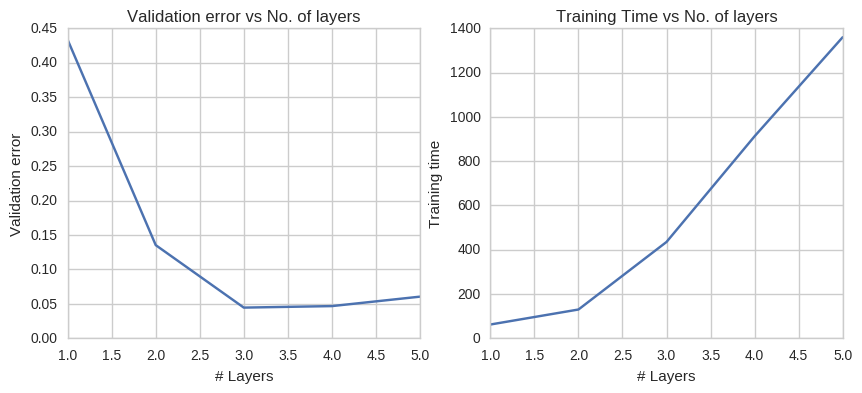

In [143]:
sns.set_style('whitegrid')
plot = sns.plt.figure(figsize=(10,4))

plot.add_subplot(121)
sns.plt.plot(data_plot.layers,
             data_plot.validation_error_final)
sns.plt.xlabel('# Layers')
sns.plt.ylabel('Validation error')
sns.plt.title('Validation error vs No. of layers');

plot.add_subplot(122)
sns.plt.plot(data_plot.layers,
             data_plot.train_time)
sns.plt.xlabel('# Layers')
sns.plt.ylabel('Training time')
sns.plt.title('Training Time vs No. of layers');

### 02. Variation of nodes

In [145]:
names = ['nodes','error_train_byEpoch','validation_error_final','train_time']
results = variation_node

data_plot=pd.DataFrame(results,columns=names)
data_plot['nodes'] = [500,300,200,100,30]
data_plot

,nodes,error_train_byEpoch,validation_error_final,train_time
0,500,"{0: 0.6952, 1: 0.6638, 2: 0.6707, 3: 0.6445, 4...",0.4769,721.440764
1,300,"{0: 0.4905, 1: 0.3571, 2: 0.3426, 3: 0.3401, 4...",0.3173,400.405412
2,200,"{0: 0.7058, 1: 0.671, 2: 0.5162, 3: 0.429, 4: ...",0.4090,292.629497
3,100,"{0: 0.3354, 1: 0.3269, 2: 0.3234, 3: 0.3249, 4...",0.3146,177.972748
4,30,"{0: 0.1007, 1: 0.0808, 2: 0.0711, 3: 0.067, 4:...",0.0576,111.340080


###### Observations :

* A trivial observation is that training time increases with increase in number of nodes used, because of increase in number of weights to train for.

* Validation error is extremely low for low number of nodes in our setting, as a result of noisy combination formed when using high number of nodes in the hidden layer without appropriate training epochs. High number of nodes need longer to reach an optimal value and hence, in the current setting, their accuray is low.

* Given the high accuracy with lower training time & lesser computational complexeity obtained by the networks with just 30 neurons in hidden layer, that seems to be a better setting than training a wider network for larger number epochs.

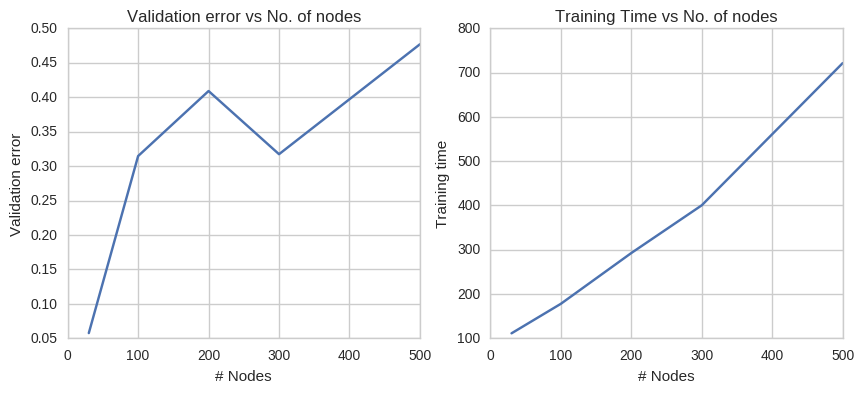

In [147]:
sns.set_style('whitegrid')
plot = sns.plt.figure(figsize=(10,4))

plot.add_subplot(121)
sns.plt.plot(data_plot.nodes,
             data_plot.validation_error_final)
sns.plt.xlabel('# Nodes')
sns.plt.ylabel('Validation error')
sns.plt.title('Validation error vs No. of nodes');

plot.add_subplot(122)
sns.plt.plot(data_plot.nodes,
             data_plot.train_time)
sns.plt.xlabel('# Nodes')
sns.plt.ylabel('Training time')
sns.plt.title('Training Time vs No. of nodes');

### 03. Variation of learning rate

In [154]:
names = ['learning_rate','error_train_byEpoch','validation_error_final','train_time']
results = variation_learning_rate

data_plot=pd.DataFrame(results,columns=names)
data_plot['learning_rate'] = learning_rate_variation
data_plot

,learning_rate,error_train_byEpoch,validation_error_final,train_time
0,0.0001,"{0: 0.9126, 1: 0.9131, 2: 0.9131, 3: 0.9113, 4...",0.8809,805.409498
1,0.0010,"{0: 0.9177, 1: 0.9076, 2: 0.8955, 3: 0.8942, 4...",0.7869,785.211745
2,0.0100,"{0: 0.894, 1: 0.8636, 2: 0.833, 3: 0.8003, 4: ...",0.5037,761.278201
3,0.1000,"{0: 0.6369, 1: 0.4692, 2: 0.3887, 3: 0.2898, 4...",0.0830,817.321678
4,1.0000,"{0: 0.1345, 1: 0.0981, 2: 0.0882, 3: 0.0818, 4...",0.0541,774.891111
5,10.0000,"{0: 0.1006, 1: 0.0811, 2: 0.0746, 3: 0.0688, 4...",0.0536,737.068849


###### Observations :

* Training time decreases with increase in learning rate because our optimizer descends faster with larger rates. FOr small rates, the effect of dWs is extremely small & hence the optimizer has to run for a long time to actually make seizable improvements to the weights.

* Validation error is low for high learning rate in the given context because of bigger strides leading to faster updates towards the minima. In geenral, larger weights might overshoot the minima value & smaller weights might take a very long time to reach the minima value & so we have to find a balance between the two.

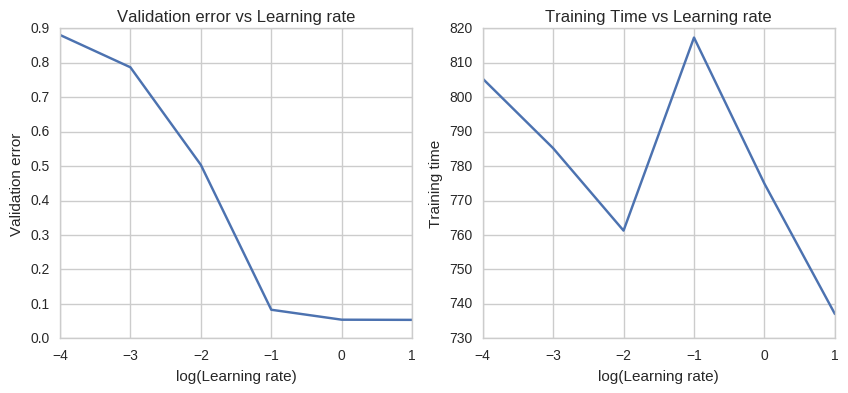

In [158]:
sns.set_style('whitegrid')
plot = sns.plt.figure(figsize=(10,4))

plot.add_subplot(121)
sns.plt.plot(np.log10(data_plot.learning_rate),
             data_plot.validation_error_final)
sns.plt.xlabel('log(Learning rate)')
sns.plt.ylabel('Validation error')
sns.plt.title('Validation error vs Learning rate');

plot.add_subplot(122)
sns.plt.plot(np.log10(data_plot.learning_rate),
             data_plot.train_time)
sns.plt.xlabel('log(Learning rate)')
sns.plt.ylabel('Training time')
sns.plt.title('Training Time vs Learning rate');

### 04. Variation of batch size

In [159]:
names = ['batch_size','error_train_byEpoch','validation_error_final','train_time']
results = variation_batch_size

data_plot=pd.DataFrame(results,columns=names)
data_plot['batch_size'] = batch_size_variation
data_plot

,batch_size,error_train_byEpoch,validation_error_final,train_time
0,1,"{0: 0.2329, 1: 0.2343, 2: 0.1986, 3: 0.1871, 4...",0.1395,191.988162
1,10,"{0: 0.088, 1: 0.0746, 2: 0.0691, 3: 0.0657, 4:...",0.0526,111.019440
2,25,"{0: 0.13, 1: 0.0951, 2: 0.0832, 3: 0.0765, 4: ...",0.0616,103.521634
3,50,"{0: 0.2319, 1: 0.1983, 2: 0.1854, 3: 0.1784, 4...",0.1604,100.663616
4,100,"{0: 0.3845, 1: 0.242, 2: 0.2067, 3: 0.1947, 4:...",0.1682,99.761203


###### Observations :

* A trivial observation is that training time increases with increase in batch size, because of decrease in total updates required.

* Error decreases sharply on increasing batch size from 1 to 10 ( essentially, batch size 1 = SGD & batch size = 10 implies mini-batch gradient descent) because the gradients calcualted in this way are more stable. On further increase in batch size, error starts increasing because insufficient updates are done as the total size of input is just 10k.

* Given the high accuracy with batch_size =10, it seems to be the ideal choice.

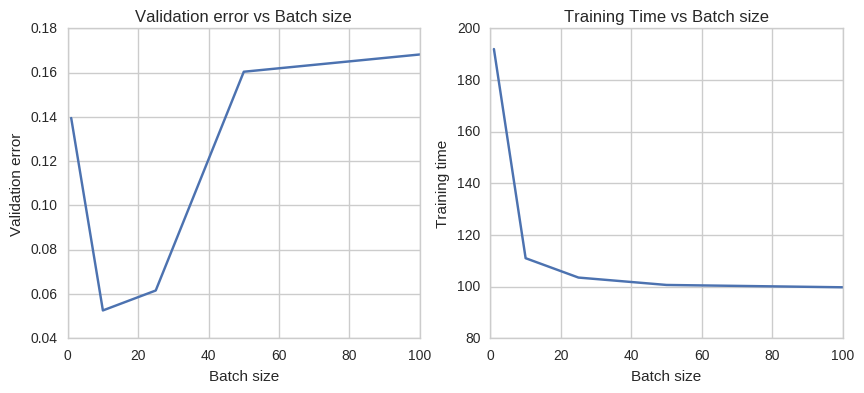

In [160]:
sns.set_style('whitegrid')
plot = sns.plt.figure(figsize=(10,4))

plot.add_subplot(121)
sns.plt.plot(data_plot.batch_size,
             data_plot.validation_error_final)
sns.plt.xlabel('Batch size')
sns.plt.ylabel('Validation error')
sns.plt.title('Validation error vs Batch size');

plot.add_subplot(122)
sns.plt.plot(data_plot.batch_size,
             data_plot.train_time)
sns.plt.xlabel('Batch size')
sns.plt.ylabel('Training time')
sns.plt.title('Training Time vs Batch size');

### 05. Variation of epochs

In [161]:
names = ['epochs','error_train_byEpoch','validation_error_final','train_time']
results = variation_epoch

data_plot=pd.DataFrame(results,columns=names)
data_plot['epochs'] = epoch_variation
data_plot

,epochs,error_train_byEpoch,validation_error_final,train_time
0,1,{0: 0.1766},0.1746,11.330550
1,10,"{0: 0.0948, 1: 0.0801, 2: 0.0701, 3: 0.0661, 4...",0.0522,110.964714
2,25,"{0: 0.0906, 1: 0.0764, 2: 0.0727, 3: 0.0698, 4...",0.0524,276.842178
3,50,"{0: 0.0912, 1: 0.078, 2: 0.0734, 3: 0.0699, 4:...",0.0477,553.567445
4,100,"{0: 0.0895, 1: 0.0807, 2: 0.0753, 3: 0.0707, 4...",0.0439,1113.654386


###### Observations :

* A trivial observation is that training time increases is a directly proportional to epochs, because the train method is nalled n(epochs) times.

* Large value for epochs generally lead to lower error rate on validation set. This is because of more optimisation runs in the train phase.

* For a given problem, a reasonable amount of epochs can be decided by checking difference in accuracy for each successive epoch & stopping when the accuracy-gain is below a pre-defined threshold.

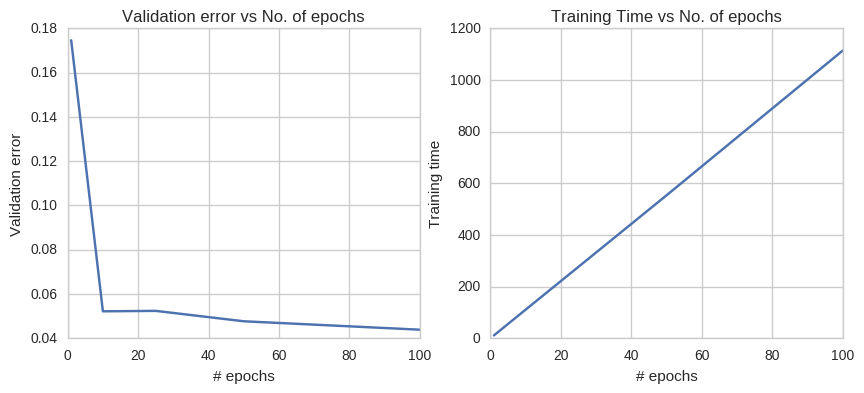

In [163]:
sns.set_style('whitegrid')
plot = sns.plt.figure(figsize=(10,4))

plot.add_subplot(121)
sns.plt.plot(data_plot.epochs,
             data_plot.validation_error_final)
sns.plt.xlabel('# epochs')
sns.plt.ylabel('Validation error')
sns.plt.title('Validation error vs No. of epochs');

plot.add_subplot(122)
sns.plt.plot(data_plot.epochs,
             data_plot.train_time)
sns.plt.xlabel('# epochs')
sns.plt.ylabel('Training time')
sns.plt.title('Training Time vs No. of epochs');